# Mass Shooting - Demo

### Initialization

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as scipy
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Simulation Set-up

### Simulate 

In [13]:
def simulate(g,n):
    t = 0 
    tfinal = 200
    alive = True
    fireRate = 10 ##shots per second
    a = 0 ##armed citizens  
    potential_a = int(n*g)
    
    ##Determine Armed Citizens
    for i in range(0,potential_a):
        if (np.random.rand()> g/2):
            a = a+1
    u = n-a ##unarmed citizens  
    
    ##Calculate probability attacker kills attacked
    def calc_d_prob(a,u):
        ##(np.random.rand()/2+0.5)
        d = 0.8/(1+5*e**(-0.1*(u+a)))*(g/(1+g)+0.4)+0.2
        #print('DEATH PROB =',d)
        return d
    
    att_p = calc_d_prob(a,u) ##probability of armed attacker to kill a civilian
    u_p = 0.05*g/(1+g) ##prob. of armed civilian to kill attacker
    
    tplot = np.asarray([t])
    uplot = np.asarray([u])
    aplot = np.asarray([a])
    totalplot =np.asarray([a+u])
    
    def kill_civilian(a,u): ##return 1 for armed civilian killed
        ran = np.random.rand()
        #print(ran, a/(a+u))
        if (ran)<(a/(a+u)):
            return 1
        return 0
    #print(a,u)
    
    ##open fire 
    t=1
    while t< fireRate and u+a>0:
        if (att_p>np.random.rand()):
            #print(a,u)
            if (a>0 and kill_civilian(a,u) == 1):
                a = a-1
            else:
                u = u-1
        tplot = np.append(tplot, t)
        uplot = np.append(uplot, u)
        aplot = np.append(aplot, a)
        totalplot =np.append(totalplot,a+u)
        t=t+1

    while (t < tfinal and alive and (a+u)>0):
        att_p = calc_d_prob(a,u)
        if (att_p>np.random.rand()):
            if (kill_civilian(a,u) == 1):
                a = a-1
            else:
                u = u -1
        
        tplot = np.append(tplot, t)
        uplot = np.append(uplot, u)
        aplot = np.append(aplot, a)
        totalplot =np.append(totalplot,a+u)
        
        ##attacker is shot back at
        if (u_p*a > np.random.rand()):
           # print("SHOT")
            alive = False
            
        t = t+1
    plt.figure()
    plt.plot(tplot, uplot, 'g*', label ='Unarmed Civilians')
    plt.plot(tplot, aplot, 'r*', label ='Armed Civilians')  
    plt.plot(tplot,totalplot,'b*',label ='Total Civilians')
    plt.title('Mass Shooting')
    plt.xlabel('Time')
    plt.ylabel('Civilians')
    plt.legend()
    plt.axis([0, 200, 0, n])
   # print ((n-(a+u))/n)
    return (n-(a+u))


In [3]:
def sim(g,n):
    #print(n)
    t = 0 
    tfinal = 200
    alive = True
    fireRate = 10 ##shots per second
    a = 0 ##armed citizens  
    potential_a = int(n*g)
    
    ##Determine Armed Citizens
    for i in range(0,potential_a):
        if (np.random.rand()> g/2):
            a = a+1
    u = n-a ##unarmed citizens  
    
    ##Calculate probability attacker kills attacked
    def calc_d_prob(a,u):
        ##(np.random.rand()/2+0.5)
        d = 0.8/(1+5*e**(-0.1*(u+a)))*(g/(1+g)+0.4)+0.2
        #print('DEATH PROB =',d)
        return d
    
    att_p = calc_d_prob(a,u) ##probability of armed attacker to kill a civilian
    u_p = 0.05*g/(1+g) ##prob. of armed civilian to kill attacker
    
    tplot = np.asarray([t])
    uplot = np.asarray([u])
    aplot = np.asarray([a])
    totalplot =np.asarray([a+u])
    
    def kill_civilian(a,u): ##return 1 for armed civilian killed
        ran = np.random.rand()
        #print(ran, a/(a+u))
        if (ran)<(a/(a+u)):
            return 1
        return 0
    #print(a,u)
    
    ##open fire 
    t=1
    while t< fireRate and u+a>0:
        if (att_p>np.random.rand()):
            #print(a,u)
            if (a>0 and kill_civilian(a,u) == 1):
                a = a-1
            else:
                u = u-1
        tplot = np.append(tplot, t)
        uplot = np.append(uplot, u)
        aplot = np.append(aplot, a)
        totalplot =np.append(totalplot,a+u)
        t=t+1

    while (t < tfinal and alive and (a+u)>0):
        att_p = calc_d_prob(a,u)
        if (att_p>np.random.rand()):
            if (kill_civilian(a,u) == 1):
                a = a-1
            else:
                u = u -1
        
        tplot = np.append(tplot, t)
        uplot = np.append(uplot, u)
        aplot = np.append(aplot, a)
        totalplot =np.append(totalplot,a+u)
        
        ##attacker is shot back at
        if (u_p*a > np.random.rand()):
           # print("SHOT")
            alive = False
            
        t = t+1
    return n-(a+u)

In [6]:
h=0.018
def f(t):
    n = 1/(1+e**(-t/50))-0.5
    #print(n)
    return n
# def d(x):
#     n = 1/(1+0.5*e**(-1.25*x+1.25))
#     print(n)
#     return n
def d(t):
    return 0.8+0.2*t
def sim_year(g):
    counter=0
    z = g+h*(1-g) #criminal availability to guns
    f_0 = sim(g,25)
    F = np.asarray([f_0]) #total number of dead civilians from mass shootings
    shooter_death_frac = f_0/25
    #print(shooter_death_frac)
    int_F = np.asarray([F[counter]])
    counter = counter +1
    #initial mass shooting at t=0
    t = np.asarray([0])
    for i in range(1,365):
        if (z*f(int_F[counter-1])>np.random.rand()): 
            n = (int)(7.5*(np.random.randn())+20)
            if (n<4):
                n=4
            F_t = sim(g,n)
            #print(F_t/n,F_t)
            F = np.append(F,F_t)
            shooter_death_frac = (shooter_death_frac*counter+(F_t/n))/(counter+1)
            #print(shooter_death_frac)
            int_F = np.append(int_F,int_F[counter-1]+F[counter])
            t = np.append(t,i)
            counter = counter +1
    plt.figure()
    plt.plot(t,F,'g*', label ='Victims per attack')
    plt.plot(t,int_F,'b*', label ='Total Victims')
    plt.title('Simulated Attacks over 1 year')
    plt.xlabel('Days of the Year')
    plt.ylabel('Number of Victims')
    plt.legend()
    return int_F[counter-1]
     

/Users/37138/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


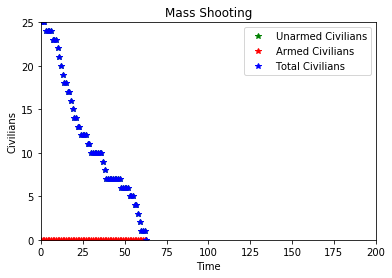

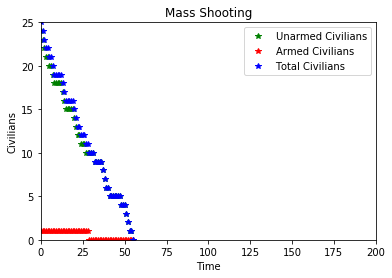

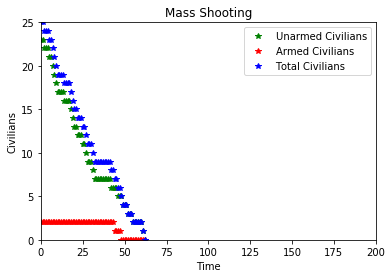

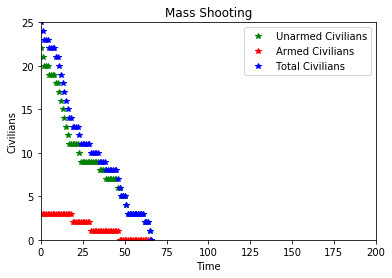

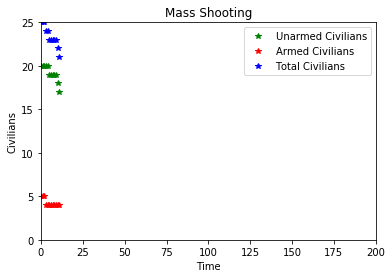

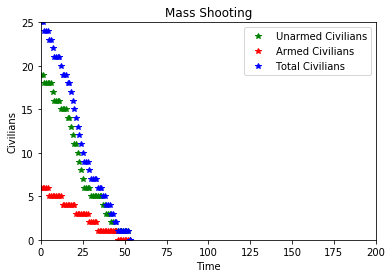

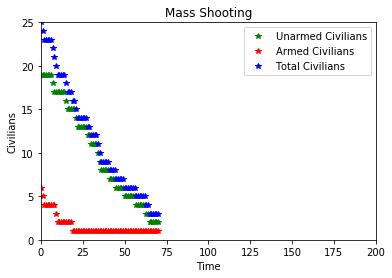

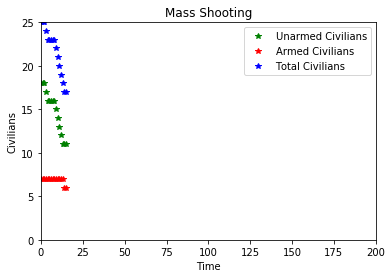

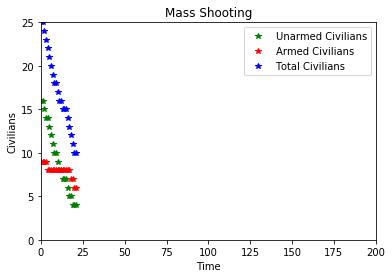

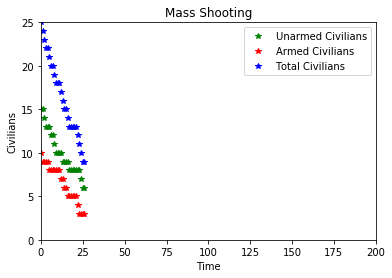

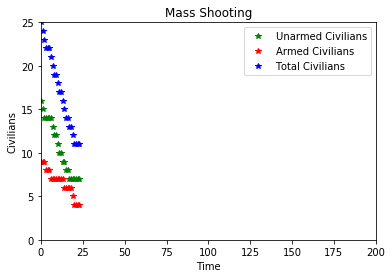

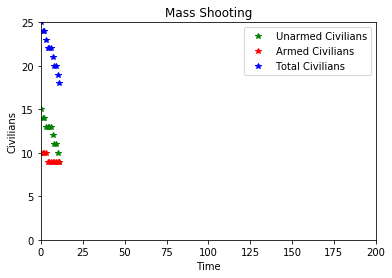

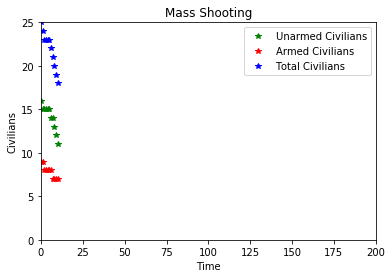

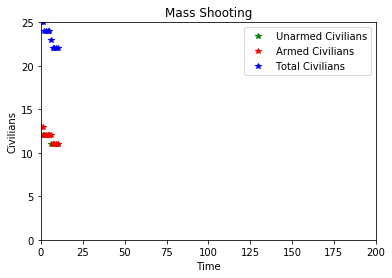

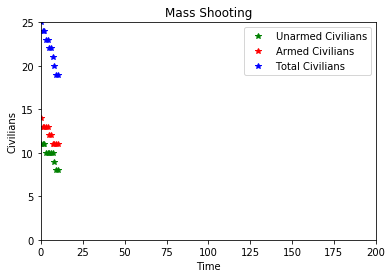

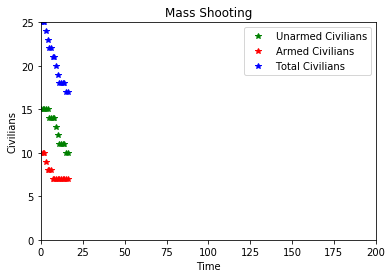

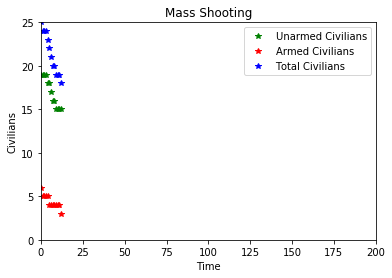

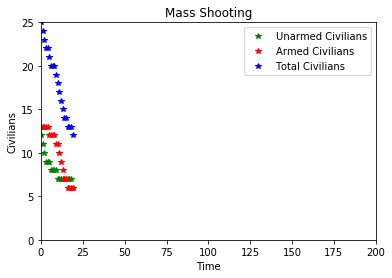

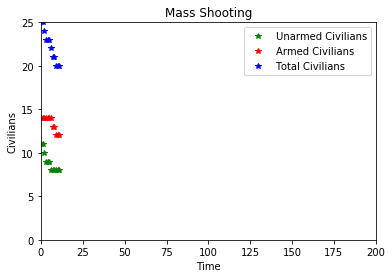

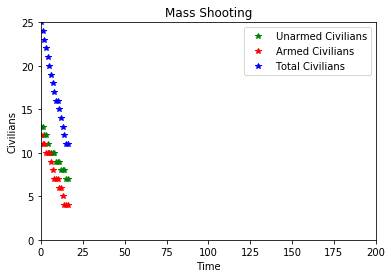

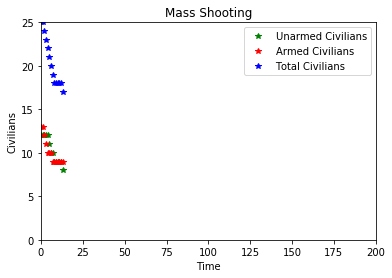

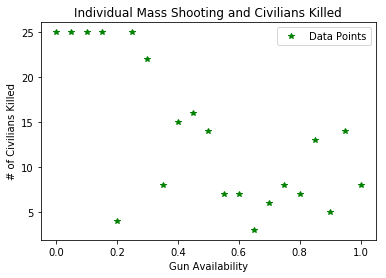

In [17]:
# 5 Individual attacks for constant n value given 5 different g values = 25 graphs
y = np.asarray([])
x = np.asarray([])
for i in range(0,21):
    y = np.append(y,simulate(i/20,25))
    x = np.append(x,i/20)
plt.figure()
plt.plot(x, y, 'g*', label = 'Data Points')
plt.title('Individual Mass Shooting and Civilians Killed')
plt.xlabel('Gun Availability')
plt.ylabel('# of Civilians Killed')
plt.legend()

Text(0,0.5,'Total number of Victims')

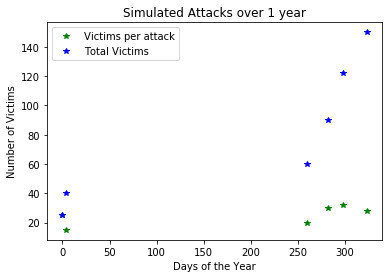

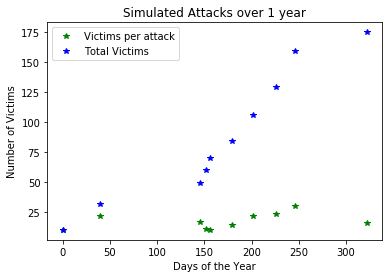

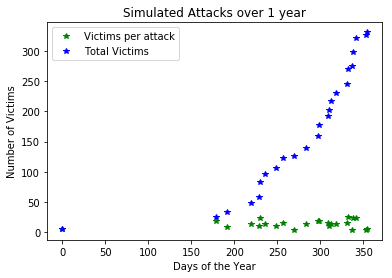

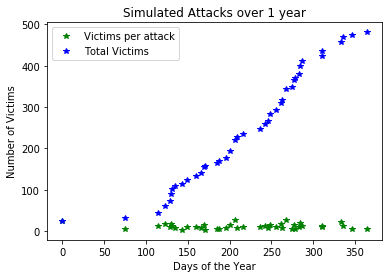

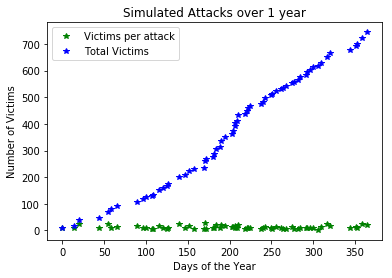

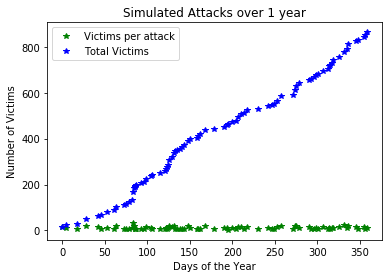

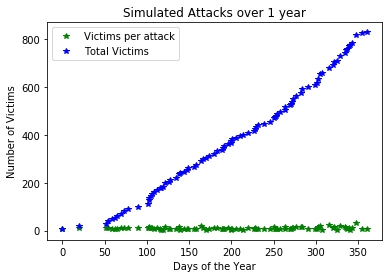

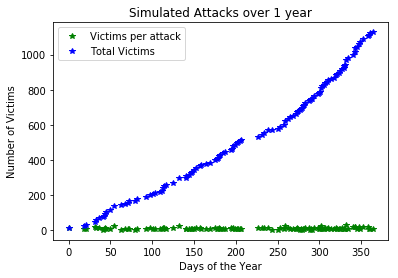

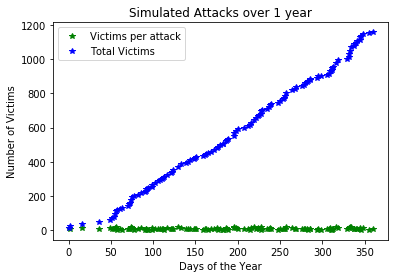

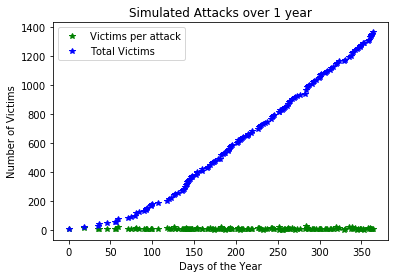

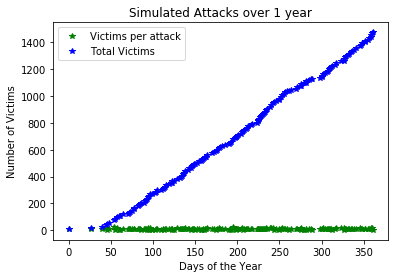

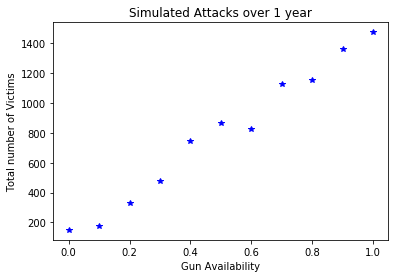

In [7]:
t_year = np.asarray([])
agg_att = np.asarray([])
for i in range(0,11):
    agg_att = np.append(agg_att,sim_year(i/10))
    t_year = np.append(t_year, i/10)
plt.figure()
plt.plot(t_year,agg_att,'b*')
plt.title('Simulated Attacks over 1 year')
plt.xlabel('Gun Availability')
plt.ylabel('Total number of Victims')  